# Assignment 7 : Clustering - Crime data

In [2]:
# import hierarchical clustering libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [3]:
df = pd.read_csv("crime_data.csv")

In [4]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
df.shape

(50, 5)

In [10]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [11]:
df.rename(columns = {'Unnamed: 0':'State'}, inplace = True)


In [12]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


<AxesSubplot:xlabel='State'>

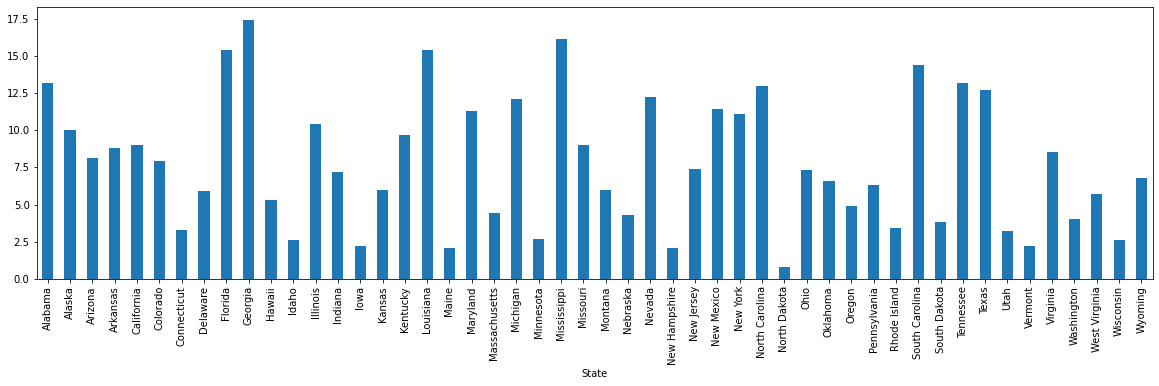

In [15]:
plt.figure(figsize=(20,5))
df.groupby('State')['Murder'].max().plot(kind='bar')


<AxesSubplot:xlabel='State'>

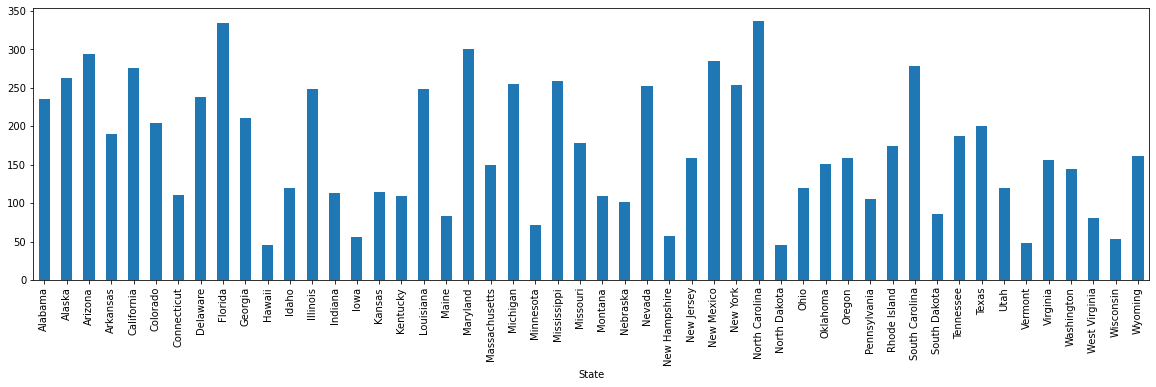

In [16]:
plt.figure(figsize=(20,5))
df.groupby('State')['Assault'].max().plot(kind='bar')

<AxesSubplot:xlabel='State'>

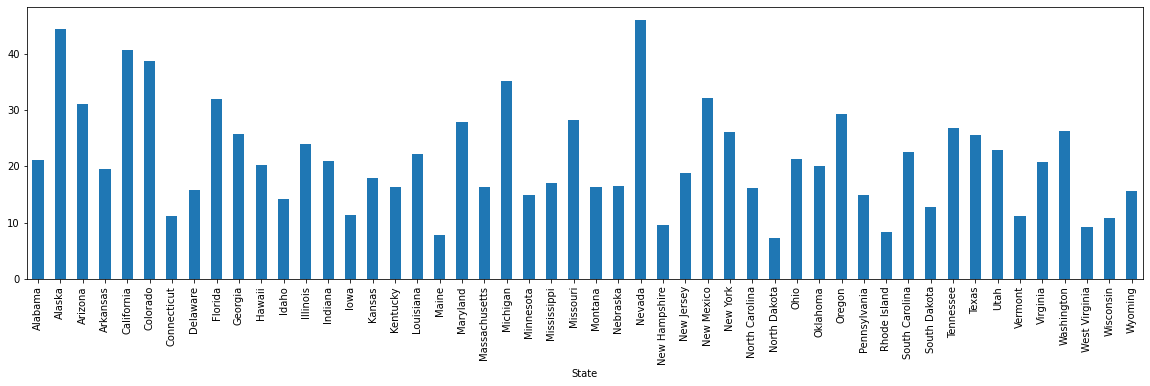

In [17]:
plt.figure(figsize=(20,5))
df.groupby('State')['Rape'].max().plot(kind='bar')

Text(0, 0.5, 'Murder')

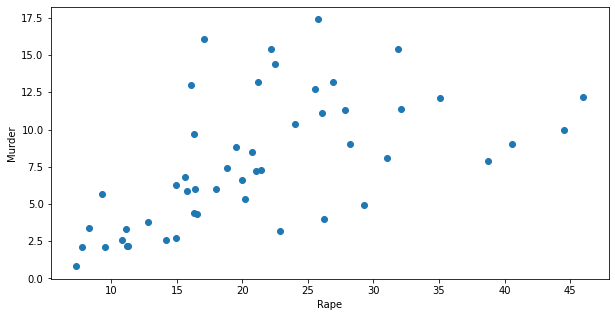

In [18]:
plt.figure(figsize=(10,5))
plt.scatter('Rape','Murder',data=df)
plt.xlabel('Rape')
plt.ylabel('Murder')

Text(0, 0.5, 'Murder')

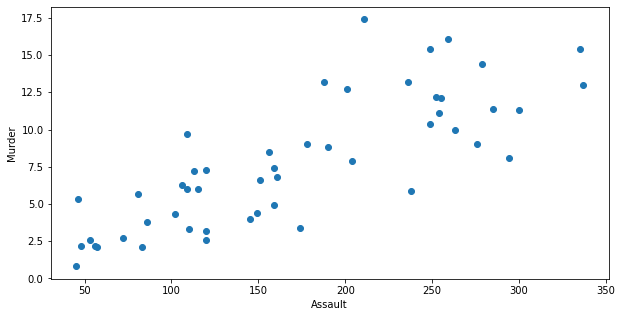

In [19]:
plt.figure(figsize=(10,5))
plt.scatter('Assault','Murder',data=df)
plt.xlabel('Assault')
plt.ylabel('Murder')

In [20]:
df.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [21]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [22]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])

In [23]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [24]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Singl Linkage

Text(0, 0.5, 'Euclidean distances')

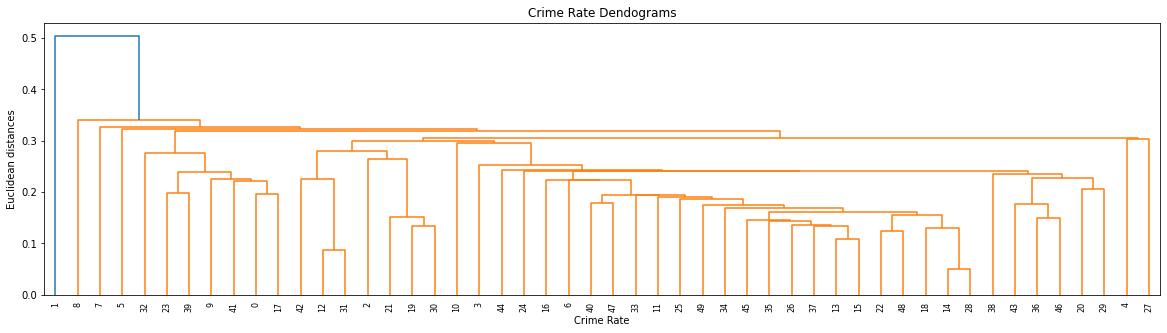

In [27]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(df_norm, method='single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

# Complete Linkage

Text(0, 0.5, 'Euclidean distances')

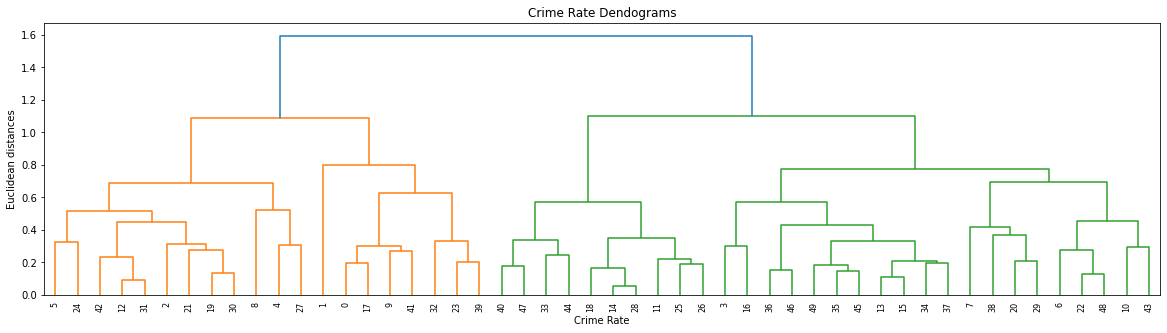

In [26]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(df_norm, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

# Average Linkage

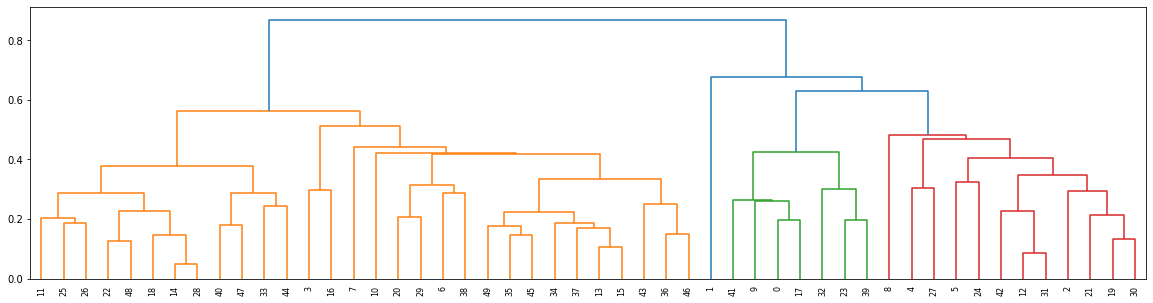

In [25]:
# create dendrogram
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [28]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean')

In [29]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [34]:
df['cluster labels']= y_hc

In [35]:
df[['State','cluster labels']]

,State,cluster labels
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,1
4,California,0
5,Colorado,0
6,Connecticut,1
7,Delaware,1
8,Florida,0
9,Georgia,0


<AxesSubplot:xlabel='cluster labels', ylabel='Murder'>

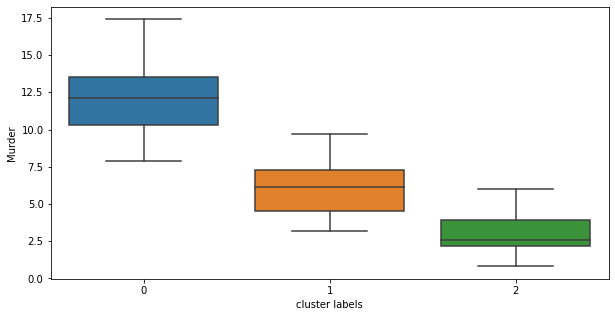

In [37]:
plt.figure(figsize=(10,5))
sn.boxplot(x='cluster labels', y='Murder', data=df)

<AxesSubplot:xlabel='cluster labels', ylabel='Rape'>

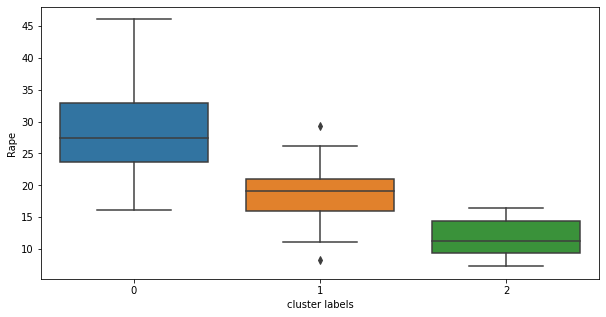

In [38]:
plt.figure(figsize=(10,5))
sn.boxplot(x='cluster labels', y='Rape', data=df)

<AxesSubplot:xlabel='cluster labels', ylabel='Assault'>

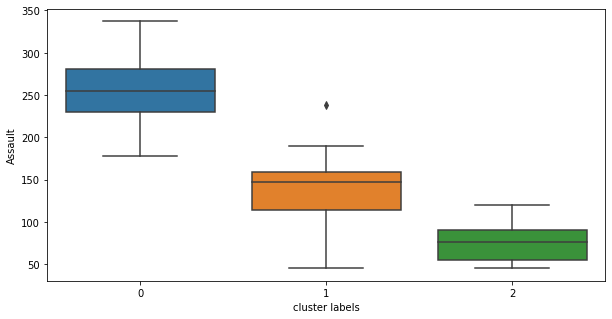

In [39]:
plt.figure(figsize=(10,5))
sn.boxplot(x='cluster labels', y='Assault', data=df)

In [30]:
Clusters

,Clusters
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [31]:
df_norm['h_clusterid'] = Clusters
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,0
6,0.150602,0.222603,0.762712,0.098191,1
7,0.307229,0.660959,0.677966,0.219638,1
8,0.879518,0.993151,0.813559,0.635659,0
9,1.000000,0.568493,0.474576,0.478036,0


In [32]:
df_norm.sort_values("h_clusterid")

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
42,0.716867,0.534247,0.813559,0.470284,0
41,0.746988,0.489726,0.457627,0.506460,0
39,0.819277,0.801370,0.271186,0.392765,0
32,0.734940,1.000000,0.220339,0.227390,0
31,0.620482,0.715753,0.915254,0.485788,0
30,0.638554,0.821918,0.644068,0.640827,0
27,0.686747,0.708904,0.830508,1.000000,0
23,0.921687,0.732877,0.203390,0.253230,0
21,0.680723,0.719178,0.711864,0.718346,0


In [33]:
df_norm.h_clusterid.value_counts()

0    20
1    18
2    12
Name: h_clusterid, dtype: int64